In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
us_data = pd.read_csv('../Assets/data/us_variants.csv', delimiter=';').to_numpy()

In [8]:
weeks_dt = np.unique(us_data[:,0])
weeks = np.linspace(0, len(weeks_dt)-1, len(weeks_dt), dtype=np.int16)
num_weeks = len(weeks)

variants = np.unique(us_data[:,1])
num_variants = len(variants)

In [135]:
weeks_dt[32]

'2021-09-11'

In [46]:
us_data[us_data[:,0] == weeks_dt[14]]

array([['2021-05-08', 'Other', 0.983424365520477, 0.9796698093414308,
        0.986646771430969],
       ['2021-05-08', 'Other', 0.982319056987762, 0.9779136776924132,
        0.986048579216003],
       ['2021-05-08', 'Other', 0.982344448566437, 0.977989137172699,
        0.986037194728851],
       ...,
       ['2021-05-08', 'Other', 0.981932163238525, 0.9776235222816468,
        0.985603928565979],
       ['2021-05-08', 'B.1.617.2', 0.018067836761475, 0.0143960732966661,
        0.022376477718353],
       ['2021-05-08', 'Other', 0.982474148273468, 0.9781364798545836,
        0.986150085926056]], dtype=object)

In [68]:
proportions = np.zeros((num_variants, num_weeks), dtype=np.float32)
proportion_count = np.zeros((num_variants, num_weeks), dtype=np.float32)

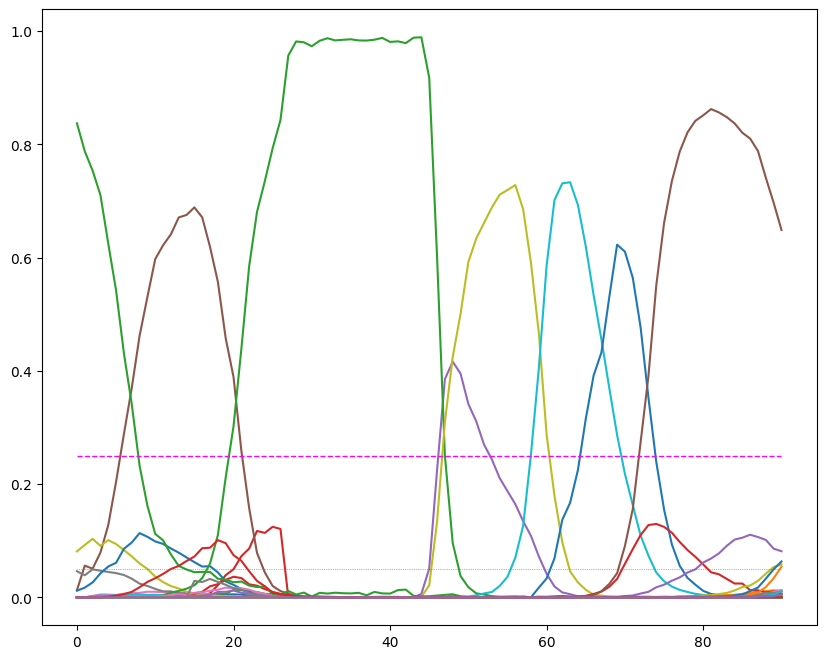

In [123]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

for v in range(num_variants):
    for w in range(num_weeks):
        reports = us_data[(us_data[:,0] == weeks_dt[w]) & (us_data[:,1] == variants[v])][:,2]
        if len(reports) > 0:
            proportions[v, w] = np.min(reports)
    ax = sns.lineplot(proportions[v])

plt.hlines(xmin=0, xmax=90, y=0.25, linestyles='dashed', colors='magenta', lw=1, label='primary variants')
plt.hlines(xmin=0, xmax=90, y=0.05, linestyles='dotted', colors='magenta', lw=0.5, label='secondary variants')

In [106]:
proportions_total = np.sum(proportions, axis=0)
proportions = proportions / proportions_total

(0.0, 1.0)

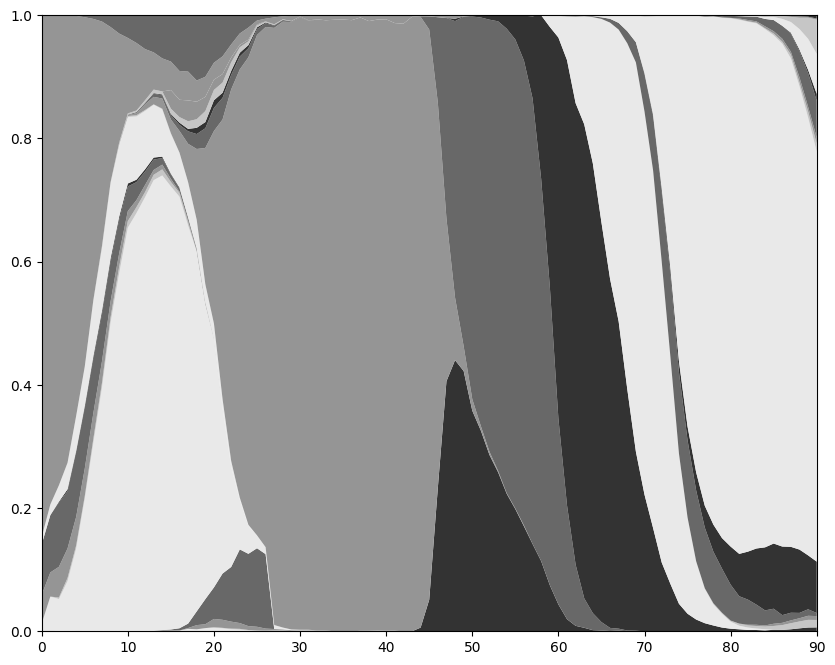

In [112]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
col = sns.color_palette("Greys", n_colors=int(num_variants / 7))
ax = plt.stackplot(
    weeks, 
    np.vstack([proportions[i,:] for i in range(num_variants)]), 
    labels=variants, colors=col
)
plt.xlim(0,90)
plt.ylim(0,1)

In [132]:
RNG = np.random.default_rng(2024)

samples = RNG.multinomial(300, pvals=proportions[:,15])
variant_id = np.where(samples != 0)
variant_id

(array([ 5,  6, 10, 12, 13, 16, 17, 32, 33, 34], dtype=int64),)

In [133]:
samples

array([  0,   0,   0,   0,   0, 210,   7,   0,   0,   0,  16,   0,   7,
         2,   0,   0,   2,   2,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  15,  18,  21], dtype=int64)